In [1]:
println("test")

test


In [2]:
# In this script I want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation included 
# Name: Leo Lagunes
# Date: 07/14/21 

# Last update: 07/20/21

# IMPORTANT NOTE: The equations were written and developed by Dr. Koan Briggs, this code was developed by LL


import Pkg; Pkg.precompile()
Pkg.add("Plots")
using Pkg
using Plots; gr()
Pkg.add("DifferentialEquations")
using DifferentialEquations

println("Almost ready!")
Pkg.update()
ENV["GRDIR"]=""
Pkg.build("GR")
println("Ready bitch!")
println("............")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


Almost ready!


    Updating registry at `~/.julia/registries/General`
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
    Building GR → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9f473cdf6e2eb360c576f9822e7c765dd9d26dbc/build.log`


Ready bitch!
............


--------------------
2 stacked rings with synthesis and degradation
--------------------
kOn: 1.0000000000000004e-6
keff: 1.0000000000000004e-6
delta: 1.0000000000000003e-5
q: 5.000000000000001e-6
---
Solving - fixed parameter set...


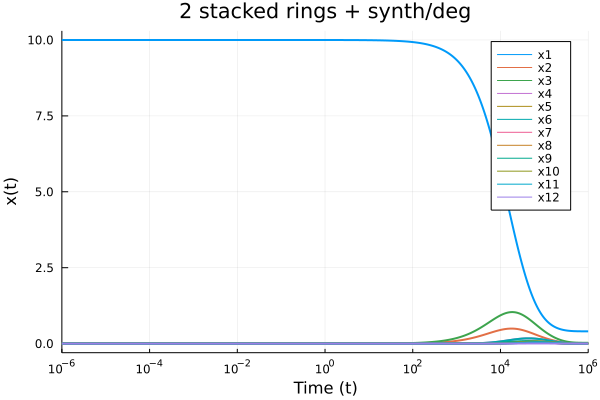

Solved 
Plot done!
Saving file...
Figure saved


In [6]:
# This cell contains the list of ODEs used for 2 stacked rings 

# Now to solve a system of ode's
println("===========================")
println("--------------------")
println("2 stacked rings with synthesis and degradation")
println("--------------------")


# --- define all parameter values ---
# k_eff is defined by a few other parameters 

i=1;j=1; # indicies that will change later 
c0 =1
α = c0^(-i-j+1); # print("alpha: " , α)
kOn = 10^-6 # M^-1 s^-1
kd1 = 1
kd2 = 1
ΔGp = -10
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 298 # in Kelvin (K)

#Q = 1 # synthesis parameter
Q = 0.5*10^-5
δ = 10^-5
xT = 10.0 
#δ = xT/Q # degradation

eConst = ℯ^( -(i+j -1) * ΔGp/(Rconst*T) )
keff = α*kOn*kd1*kd2*eConst
keff = 10^-6

# print("Keff: ", keff)

# --- define list of ode's --- 
# there are a total of 12 equations/species 
# dx: list of odes
# x: list of species
# p: parameters
# t: time (do not touch!)
function twoStackedRingsSystem!(dx,x,p,t)
    kOn, keff, δ, Q = p
    dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8]-3*x[9] -2*x[10]-x[11]) + 2*keff*x[2] + +2*keff*x[3] + keff*x[4] + keff*x[4] + 2*keff*x[5] +keff*x[6] + keff*x[6]+2*keff*x[7] + 4*keff*x[8] + 3*keff*x[9] +2*keff*x[10]+keff*x[10] + 2*keff*x[11] + keff*x[11] + 2*keff*x[11] + 6*keff*x[12] - δ*x[1] + Q
    dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff*x[2]+keff*x[4]+keff*x[6]+2*keff*x[8]+keff*x[10]+2*keff*x[11] + 3*keff*x[12] -δ*x[2]
    dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff*x[3] + keff*x[4]+2*keff*x[5] + keff*x[6]+2*keff*x[7]+ 2*keff*x[8] + 3*keff*x[9]+keff*x[10]+2*keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[3]
    dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff*x[4] - keff*x[4] + 2*keff*x[5] +2*keff*x[8]+ keff*x[10] + keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[4]
    dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff*x[5] -keff*x[5] + keff*x[11] - δ*x[5]
    dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff*x[6] - keff*x[6] + 2*keff*x[7] + 2*keff*x[8] + keff*x[10] + keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[6]
    dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff*x[7] - keff*x[7] + keff*x[11] - δ*x[7]
    dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff*x[8] - keff*x[8] - keff*x[8] + keff*x[11] + 3*keff*x[12] - δ*x[8]
    dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff*x[9] + keff*x[10] + keff*x[11] + 2*keff*x[12] - δ*x[9]
    dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff*x[10] -keff*x[10]+2*keff*x[11] +6*keff*x[12] - δ*x[10]
    dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff*x[11] -keff*x[11] -2*keff*x[11] -2*keff*x[11] -keff*x[11] +6*keff*x[12] - δ*x[11]
    dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff*x[12] -3*keff*x[12]-6*keff*x[12] -6*keff*x[12] -keff*x[12] -δ*x[12]
end


# --- initial conditions --- 
x0=[10.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
# --- parameter values ---
p = (kOn, keff, δ, Q) # fixed parameters
# print parameter values 
println("kOn: ", kOn)
println("keff: ", keff)
println("delta: ", δ)
println("q: ", Q)


# --- time span --- 
tspan = (0.000001, 10.0^6)

# --- ode solver --- 
println("---")
println("Solving - fixed parameter set...")
prob = ODEProblem(twoStackedRingsSystem!,x0,tspan,p)
sol = solve(prob);
println("Solved ")
# Plot solutions 

using Plots; gr()
p1=plot(sol,linewidth=2,title="2 stacked rings + synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
println("Saving file...")
savefig("C:\\plot_2SR_0715_001.png")
println("Figure saved")

---
Solving - fixed parameter set...


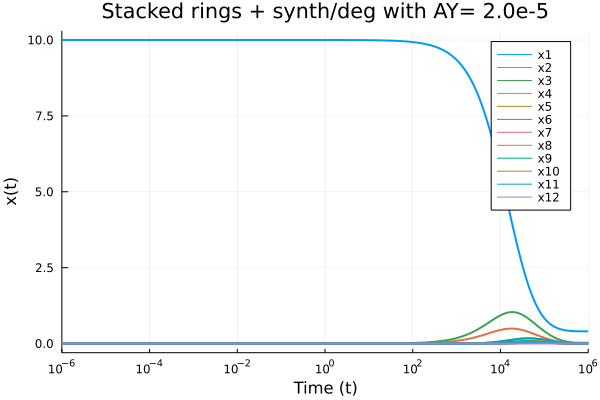

Solved 
Plot done!
Saving file...
Figure saved


In [59]:
# Write a function for solving the ode given a parameter set 
# Plot solutions 
using Plots; gr()

# list of all functions 

# --- solve odes ----
function stackedRings_sd(paramvaluesList)
    x0Val,kOn, keff, δ, Q = paramvaluesList
    p = kOn, keff, δ, Q
    # This function will solve the system of ode's given a parameter set 
    function twoStackedRingsSystem!(dx,x,p,t)
        kOn, keff, δ, Q = p
        dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8]-3*x[9] -2*x[10]-x[11]) + 2*keff*x[2] + +2*keff*x[3] + keff*x[4] + keff*x[4] + 2*keff*x[5] +keff*x[6] + keff*x[6]+2*keff*x[7] + 4*keff*x[8] + 3*keff*x[9] +2*keff*x[10]+keff*x[10] + 2*keff*x[11] + keff*x[11] + 2*keff*x[11] + 6*keff*x[12] - δ*x[1] + Q
        dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff*x[2]+keff*x[4]+keff*x[6]+2*keff*x[8]+keff*x[10]+2*keff*x[11] + 3*keff*x[12] -δ*x[2]
        dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff*x[3] + keff*x[4]+2*keff*x[5] + keff*x[6]+2*keff*x[7]+ 2*keff*x[8] + 3*keff*x[9]+keff*x[10]+2*keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[3]
        dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff*x[4] - keff*x[4] + 2*keff*x[5] +2*keff*x[8]+ keff*x[10] + keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[4]
        dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff*x[5] -keff*x[5] + keff*x[11] - δ*x[5]
        dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff*x[6] - keff*x[6] + 2*keff*x[7] + 2*keff*x[8] + keff*x[10] + keff*x[11] + keff*x[11] + 6*keff*x[12] - δ*x[6]
        dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff*x[7] - keff*x[7] + keff*x[11] - δ*x[7]
        dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff*x[8] - keff*x[8] - keff*x[8] + keff*x[11] + 3*keff*x[12] - δ*x[8]
        dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff*x[9] + keff*x[10] + keff*x[11] + 2*keff*x[12] - δ*x[9]
        dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff*x[10] -keff*x[10]+2*keff*x[11] +6*keff*x[12] - δ*x[10]
        dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff*x[11] -keff*x[11] -2*keff*x[11] -2*keff*x[11] -keff*x[11] +6*keff*x[12] - δ*x[11]
        dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff*x[12] -3*keff*x[12]-6*keff*x[12] -6*keff*x[12] -keff*x[12] -δ*x[12]
    end
    # --- initial conditions --- 
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    # --- parameter values ---
    p = (kOn, keff, δ, Q) # fixed parameters
    # print parameter values 
    #println("Parameters: ")
    #println("kOn: ", kOn)
    #println("keff: ", keff)
    #println("delta: ", δ)
    #println("q: ", Q)
    # --- time span --- 
    tspan = (0.000001, 10.0^6)

    # --- ode solver --- 
    println("---")
    println("Solving - fixed parameter set...")
    prob = ODEProblem(twoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob);
    println("Solved ")
    return sol
        
end 

# --- plot the time course ---
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

# --- calculate the AY ---
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end 





# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

# Now to calculate the Assembly Yield - AY
# I want to determine the AY at 24hrs for x12 

# Yn = n*Xn/XT
x0Val=10
keff = 10^-6
kOn = 10^-6 
Q = 0.5*10^-5
δ = 10^-5
# --- define parameters list ---
paramvaluesList = x0Val, kOn, keff, δ, Q

sol1 = stackedRings_sd(paramvaluesList)
# print(sol1)
#plotTimeCourse(sol1)
AY = assemblyYield(sol1);
plotTimeCourse(sol1,AY)

In [56]:


# -- calculate XT --- 




